### 본론1
    - 문제정의: 시장 위험을 피할 수 있는 방법은 없을까?
    - 관찰: 미국주식시장의 움직임과 세계 경제 시장의 움직임이 상관관계가 높음을 확인
    - 주장: 주식 시장 뿐 아니라 다른 시장에 투자한다면 더욱 안전한 투자가 가능할 것이다. 
    - 검증: 
    - 결론: 
      - insight: 멀티에셋 투자의 중요성
        - 1) 분산투자 효과를 결정짓는 것은 투자 자산들 간의 상관계수이다.
        - 2) 같은 자산군에서 투자 자산을 늘리는 것 대신 자산군의 다양화를 통해 분산투자 효과를 증폭시킬 수 있다.) 
        - 추가 문제 제시: 수익률을 높히는 방법을 고민해보자.




In [2]:
import yfinance as yf
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
# 거시경제지표
econ_regime = pd.read_csv('econ_regime.csv', index_col=0)
econ_regime.index = pd.to_datetime(econ_regime.index)

In [31]:
spy500_index = yf.download('SPY', start='1984-12-31', end='2021-12-31')['Adj Close']
spy500_index.index = pd.to_datetime(pd.to_datetime(spy500_index.index).date)
spy500_index = spy500_index.resample('M').last()

[*********************100%***********************]  1 of 1 completed


In [34]:
diffusion = econ_regime['Diffusion'].dropna()
diffusion.loc['1993-01', :]

IndexingError: Too many indexers

In [29]:
display(spy500_index)
diffusion

1993-01-29     25.218233
1993-02-01     25.397581
1993-02-02     25.451395
1993-02-03     25.720430
1993-02-04     25.828056
                 ...    
2021-12-23    463.087189
2021-12-27    469.640900
2021-12-28    469.257080
2021-12-29    469.857391
2021-12-30    468.558441
Name: Adj Close, Length: 7284, dtype: float64

1984-12-31    0.333333
1985-01-31    0.380952
1985-02-28    0.428571
1985-03-31    0.454545
1985-04-30    0.409091
                ...   
2021-08-31    0.771429
2021-09-30    0.628571
2021-10-31    0.457143
2021-11-30    0.400000
2021-12-31    0.342857
Name: Diffusion, Length: 445, dtype: float64

In [7]:
import scipy.stats
import matplotlib.pyplot as plt

<AxesSubplot: ylabel='Count'>

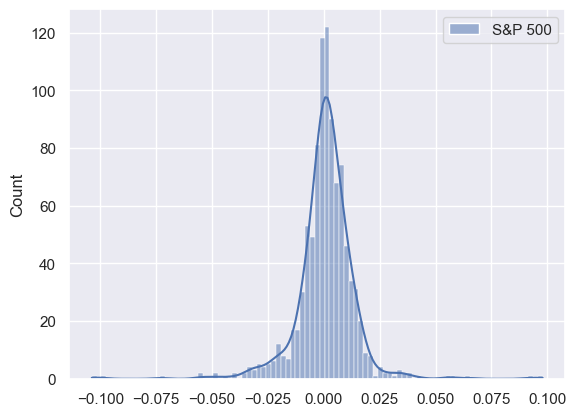

In [8]:
sns.histplot(data=sp500_index.pct_change().fillna(0), kde=True)

In [14]:
sp500_index.pct_change().fillna(0).describe()

,S&P 500
count,956.000000
mean,0.000861
std,0.013305
min,-0.103768
25%,-0.003731
50%,0.001319
75%,0.006953
max,0.097949


In [15]:
index_rets = sp500_index.pct_change().fillna(0)

In [16]:
low_thresh = index_rets.quantile(1/3)
high_thresh = index_rets.quantile(2/3)

In [19]:
index_rets > high_thresh

,S&P 500
2018-01-02,False
2018-01-03,True
2018-01-04,True
2018-01-05,True
2018-01-08,False
...,...
2021-12-23,True
2021-12-27,True
2021-12-28,False
2021-12-29,False


<AxesSubplot: >

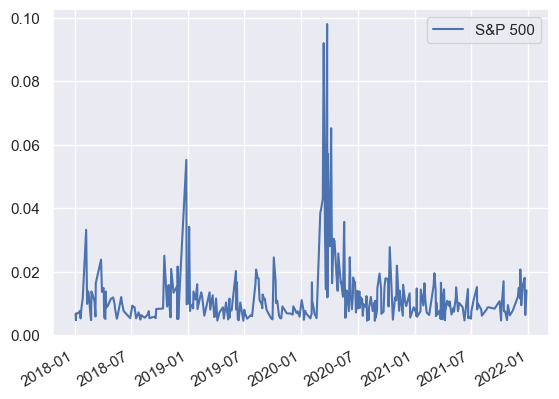

In [27]:
check_date = index_rets[index_rets > high_thresh].dropna(axis=0)#.reset_index()
check_date.plot()

In [13]:
sns.histplot(data=price_universe.pct_change().fillna(0), kde=True, hue=col_name)

ValueError: The following variable cannot be assigned with wide-form data: `hue`